In [1]:
%matplotlib inline

In [2]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

### 勾配降下法

In [ ]:
class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
    
    def solve(self, init):
        x = init
        path = []
        grad = self.df(x)
        path.append(x)
        while (grad**2).sum() > self.eps**2: # L2ノルムがepsを下回るまで
            x = x - self.alpha * grad
            grad = self.df(x)
            path.append(x)
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)

In [ ]:
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])

algo = GradientDescent(f, df)
initial = np.array([1, 1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

plt.scatter(initial[0], initial[1], color="k", marker="o")
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color="k", linewidth=1.5)
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]
plt.contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, color="k", linestyles="dotted")

plt.show()

   ### ニュートン法

In [ ]:
def newton1dim(f, df, x0, eps=1e-10, max_iter=1000):
    x = x0
    iter  = 0
    while True:
        x_new = x - f(x)/df(x)
        if abs(x-x_new) < eps:
            break
        x = x_new
        iter += 1
        if iter == max_iter:
            break
    return x_new

def f(x):
    return x**3-5*x+1

def df(x):
    return 3*x**2-5

print(newton1dim(f, df, 2))
print(newton1dim(f, df, 0))
print(newton1dim(f, df, -3))

In [ ]:
class Newton:
    def __init__(self, f, df, eps=1e-10, max_iter=1000):
        self.f = f
        self.df = df
        self.eps = eps
        self.max_iter = max_iter
    
    def solve(self, x0):
        x = x0
        iter = 0
        self.path_ = x0.reshape(1, -1)
        while True:
            x_new = x - np.dot(linalg.inv(self.df(x)), self.f(x))
            self.path_ = np.r_[self.path_, x_new.reshape(1, -1)]
            if ((x-x_new)**2).sum() < self.eps*self.eps:
                break
            x = x_new
            iter += 1
            if iter == self.max_iter:
                break
        return x_new

In [ ]:
def f1(x, y):
    return x**3-2*y

def f2(x, y):
    return x**2+y**2-1

def f(xx):
    x = xx[0]
    y = xx[1]
    return np.array([f1(x, y), f2(x, y)])

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([[3*x**2, -2], [2*x, 2*y]])

xmin, xmax, ymin, ymax = -3, 3, -3, 3
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)
xmesh, ymesh = np.meshgrid(x,y)
z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)
plt.contour(xmesh, ymesh, z1, colors="r", levels=[0])
plt.contour(xmesh, ymesh, z2, colors="k", levels=[0])
solver = Newton(f, df)

initials = [np.array([1, 1]),
            np.array([-1, -1]),
            np.array([1, 1])]
markers = ["+", "*", "x"]

for x0, m in zip(initials, markers):
    sol = solver.solve(x0)
    plt.scatter(solver.path_[:, 0], solver.path_[:, 1], color="k", marker=m)
    print(sol)

plt.show()

### 線形回帰（原点を通る直線による近似）

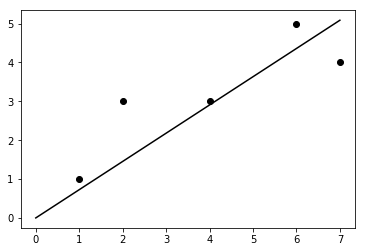

In [4]:
def reg1dim1(x, y):
    a = np.dot(x, y) / (x**2).sum()
    return a

x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])
a = reg1dim1(x, y)

plt.scatter(x, y, color="k")
xmax = x.max()
plt.plot([0, xmax], [0, a*xmax], color="k")
plt.show()

### 線形回帰（一般の直線による近似）

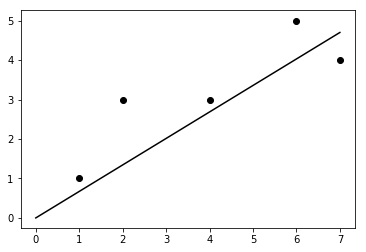

In [7]:
def reg1dim2(x, y):
    n = len(x)
    a = ((np.dot(x, y) - y.sum() * x.sum() / n) / ((x**2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum()) / n
    return a, b

x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])
a, b = reg1dim2(x, y)

plt.scatter(x, y, color="k")
xmax = x.max()
plt.plot([0, xmax], [0, a * xmax + b], color="k")
plt.show()

### 一般次元の線形回帰モデル

In [9]:
from scipy import linalg
class LinearRegression:
    def __init__(self):
        self.w_ = None
    
    def fit(self, X, t):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        A = np.dot(Xtil.T, Xtil)
        b = np.dot(Xtil.T, t)
        self.w_ = linalg.solve(A, b)
        
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

係数: [ 1.11450326  1.95737004  3.00295751]
(1, 1)に対する予測値: [ 6.07483081]


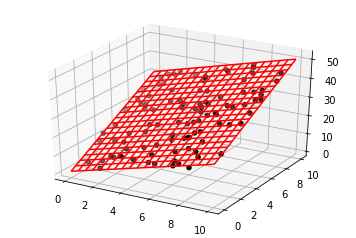

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

n = 100
scale = 10
np.random.seed(0)
X = np.random.random((n, 2)) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)

model = LinearRegression()
model.fit(X, y)
print("係数:", model.w_)
print("(1, 1)に対する予測値:", model.predict(np.array([1, 1])))

xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20), np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], y, color="k")
ax.plot_wireframe(xmesh, ymesh, zmesh, color="r")
plt.show()

### 実践的な例

In [13]:
import csv

Xy = []
with open("dataset/winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64)

np.random.seed(0)
np.random.shuffle(Xy)
train_X = Xy[:-1000, :-1]
train_y = Xy[:-1000, -1]
test_X = Xy[-1000:, :-1]
test_y = Xy[-1000:, -1]

model = LinearRegression()
model.fit(train_X, train_y)

y = model.predict(test_X)

print("最初の５つの正解と予測値")
for i in range(5):
    print("{:1.0f}{:5.3f}".format(test_y[i], y[i]))
print()
print("RMSE:", np.sqrt(((test_y - y)**2).mean()))

最初の５つの正解と予測値
76.012
65.734
55.285
86.352
55.414

RMSE: 0.672424854846


In [27]:
c = np.eye(5)

In [30]:
c * 5

array([[ 5.,  0.,  0.,  0.,  0.],
       [ 0.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  5.]])